In [1]:
from functions import get_gz_array, get_coords_and_mask, calculate_delta_gs_triaxial, plot_colourmap_gz, calculate_internal_g, calculate_delta_gs_oblate, calculate_delta_gs_prolate
from functions import plot_gz_decay_comparison, calculate_lambda
from functions import get_body_rotation_abg, get_body_rotation_sdr, generate_basic_ellipsoid, global_to_local, get_V_as_Euler
from functions import gz_rotated_ellipsoid
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(threshold=sys.maxsize)


In [2]:
a, b, c = (5, 4, 3)
yaw, pitch, roll = (0, -30, 0)

In [3]:
e, n, u, internal_mask = get_coords_and_mask((-10, 10, -10, 10), 0.5, 1, a, b, c)
obs_points = np.vstack((e.ravel(), n.ravel(), u.ravel()))
density = 2000

In [4]:
_, _, gu = gz_rotated_ellipsoid(a, b, c, yaw, pitch, roll, e, n, u, density=density)

In [5]:
print()

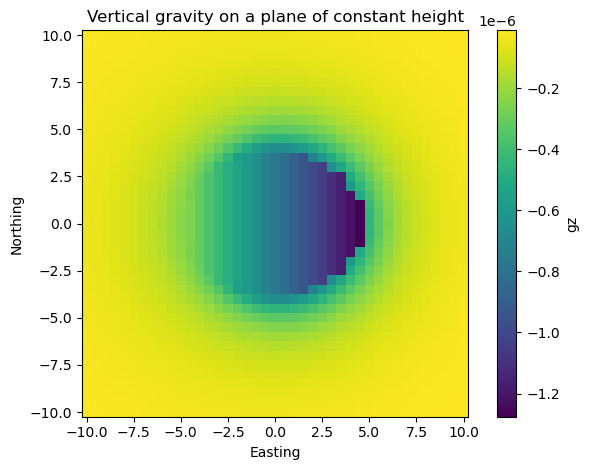

In [6]:
plt.pcolormesh(e, n, gu)
plt.gca().set_aspect("equal")
plt.colorbar(label="gz")
plt.title("Vertical gravity on a plane of constant height")
plt.xlabel("Easting")
plt.tight_layout()
plt.ylabel("Northing")
plt.show()

In [7]:
yaw, pitch, roll = (0, -30, 0)

In [8]:
g = [0.4, 0, 0.5]

In [9]:
V = get_V_as_Euler(yaw, pitch, roll)
V

array([[ 0.8660254,  0.       ,  0.5      ],
       [ 0.       ,  1.       ,  0.       ],
       [-0.5      ,  0.       ,  0.8660254]])

In [10]:
vector = [1, 0, 0]

In [11]:
V.T @ g 

array([0.09641016, 0.        , 0.6330127 ])

<IPython.core.display.Javascript object>


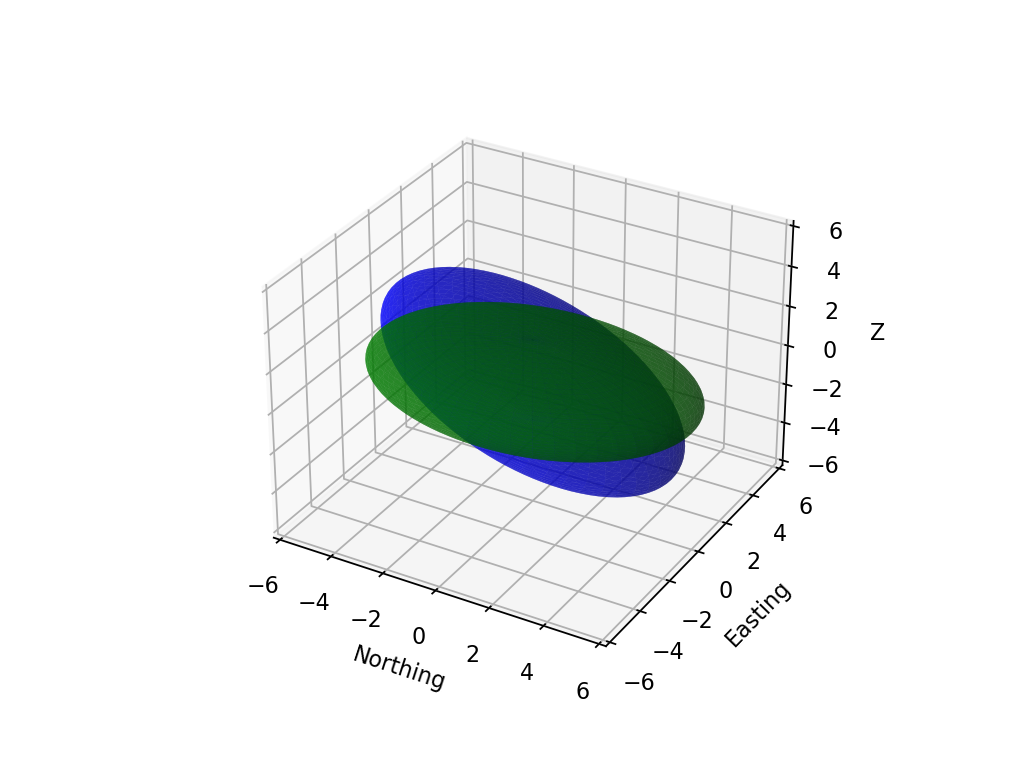

Text(0.5, 0, 'Z')

In [12]:
%matplotlib notebook

a, b, c = 6, 4, 2
x1, y1, z1 = generate_basic_ellipsoid(a, b, c)
local_coords = global_to_local(x1, y1, z1, 0, V)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

max_radius = max(a, b, c)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
    
ax.plot_surface(x1, y1, z1, color='green', alpha=0.6, label = 'Original')
ax.plot_surface(local_coords[0], local_coords[1], local_coords[2], color='blue', alpha=0.6, label='Rotated')
ax.set_xlabel('Northing')
ax.set_ylabel('Easting')
ax.set_zlabel('Z')


